GRIP : The Sparks Foundation
----
#GRIPDECEMBER22

__Name: Amritha Prakash__

Data Science and Business Intelligence Internship


__Task 6 - Prediction using Decision Tree Algorithm__


Task -  

Create a Decision Tree Classifer and visualize it graphically    
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly     
Data set - https://bit.ly/3kXTdox

In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from io import StringIO
import pandas as pd

%matplotlib inline

In [2]:

# Loading the iris dataset
iris_dataset=pd.read_csv("Iris.csv")

iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Data Cleaning
iris_dataset.shape

(150, 6)

In [4]:
iris_dataset=iris_dataset.drop(columns='Id')

In [5]:
#check null values
iris_dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#check duplicate values
iris_dataset.duplicated().sum()

3

In [7]:
iris_dataset=iris_dataset.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
iris_dataset.shape

(147, 5)

In [8]:
#Encoding the target variable
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(iris_dataset['Species'])
iris_dataset['Species']=lb.transform(iris_dataset['Species'])

In [9]:
iris_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
#Divide the dataset into independent and dependent variables
X=iris_dataset.drop('Species',axis=1)
y=iris_dataset['Species']

In [22]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

In [23]:
dt_iris=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
dt_iris.fit(X_train,y_train)
# using entropy as the criterion

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

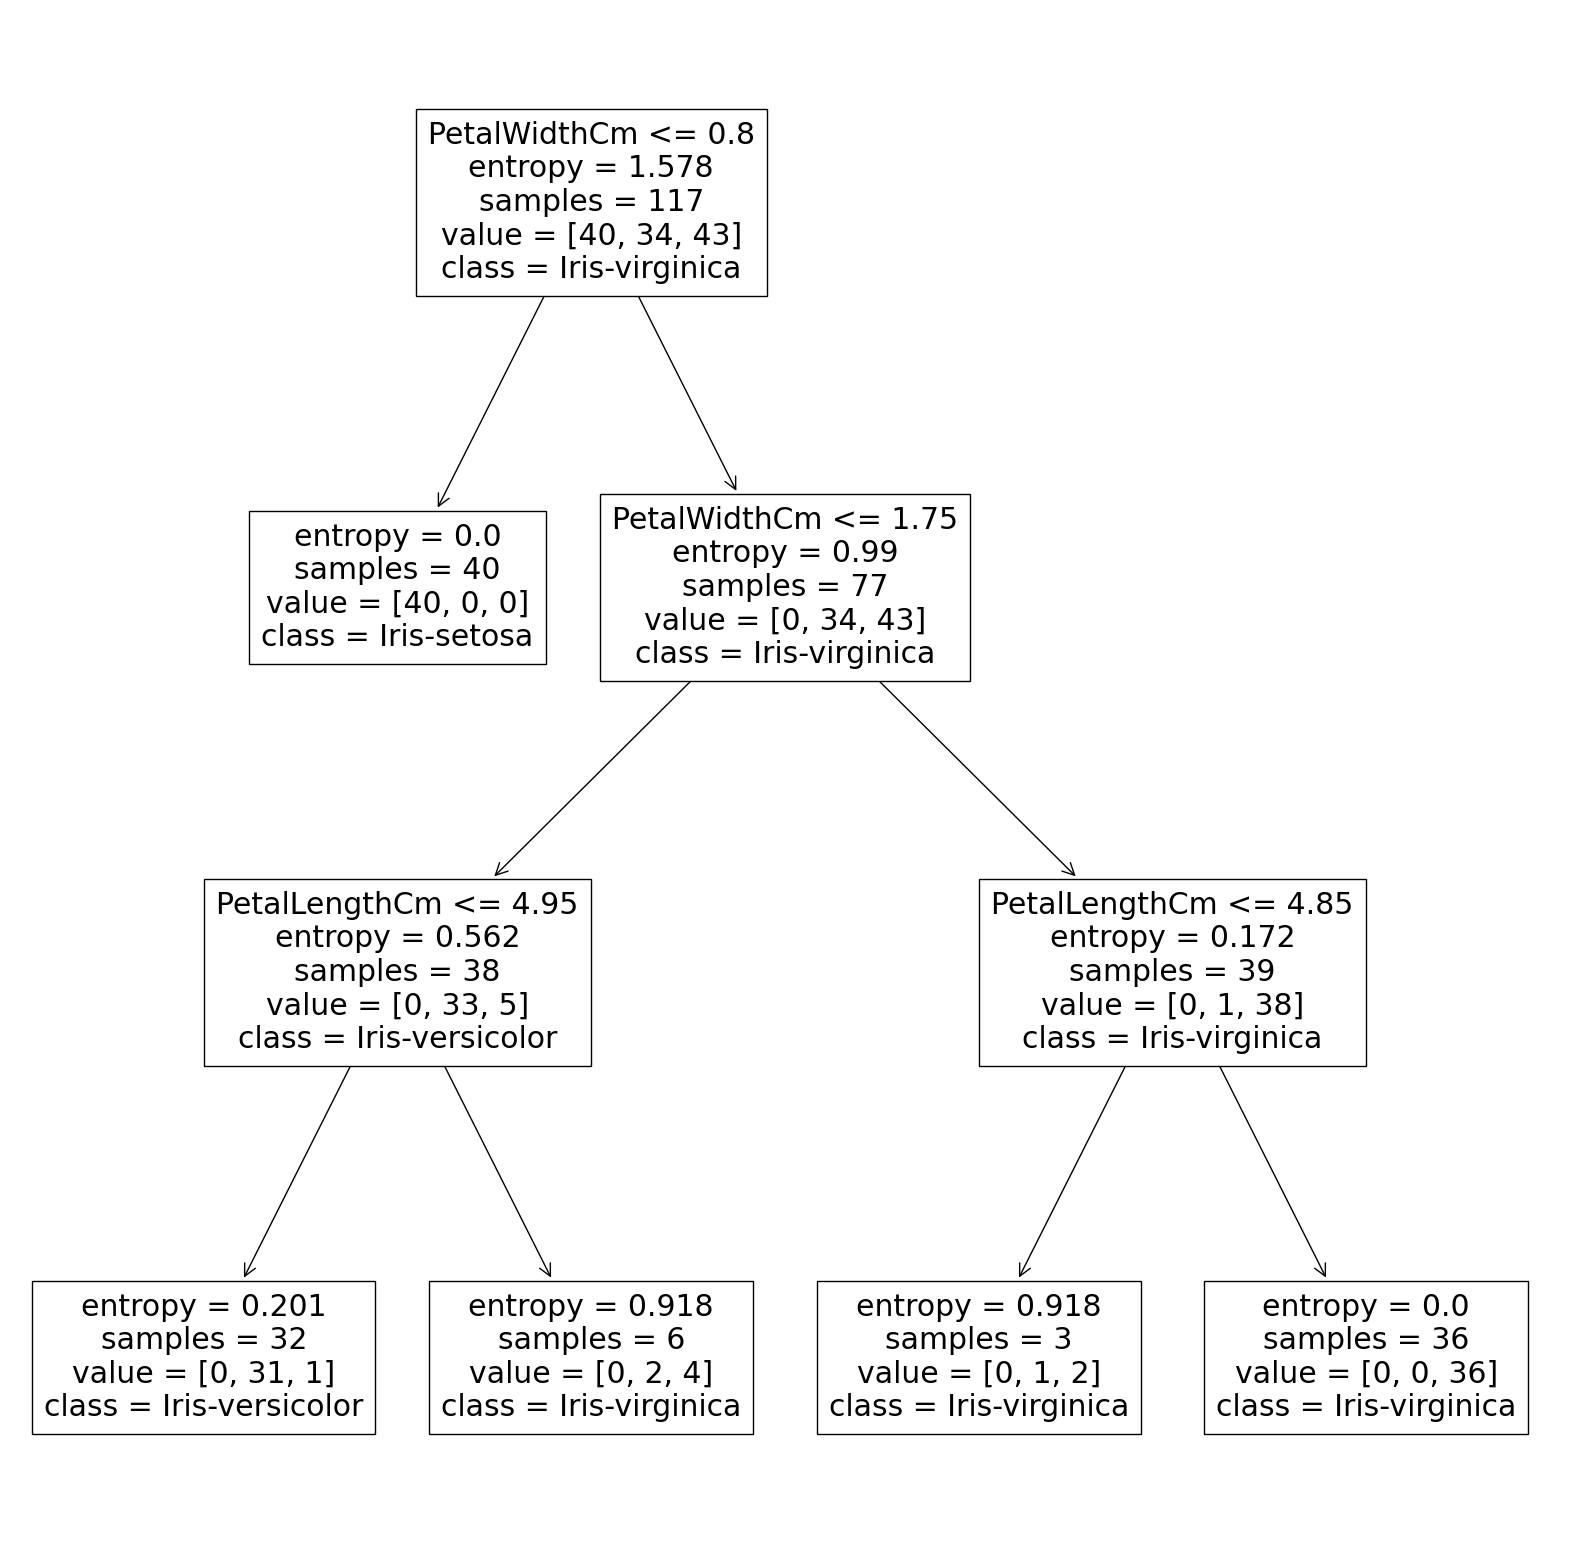

In [24]:
#plot tree can be used for visualising the tree
plt.figure(figsize=(20,20))
plot_tree(dt_iris,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [25]:
#Calculating accuracy
pred = dt_iris.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 1.0


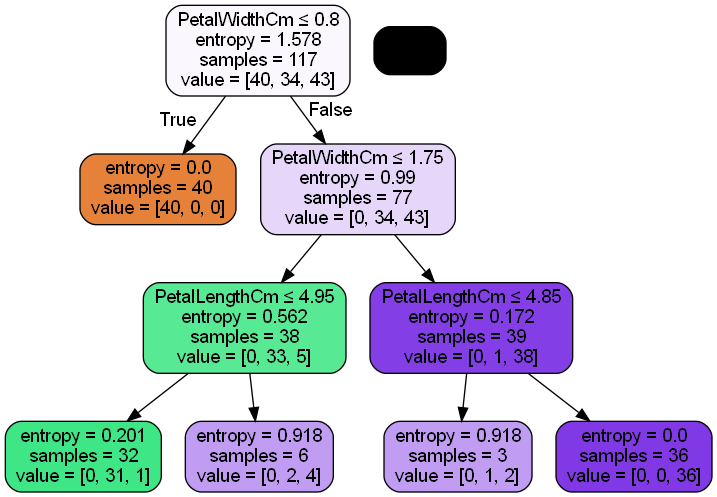

In [26]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt_iris, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
# USING GINI INDEX -

In [28]:
dt_iris=DecisionTreeClassifier(criterion='gini',splitter='best',max_features=3,max_depth=3)
dt_iris.fit(X_train,y_train)
# using gini as the criterion

DecisionTreeClassifier(max_depth=3, max_features=3)

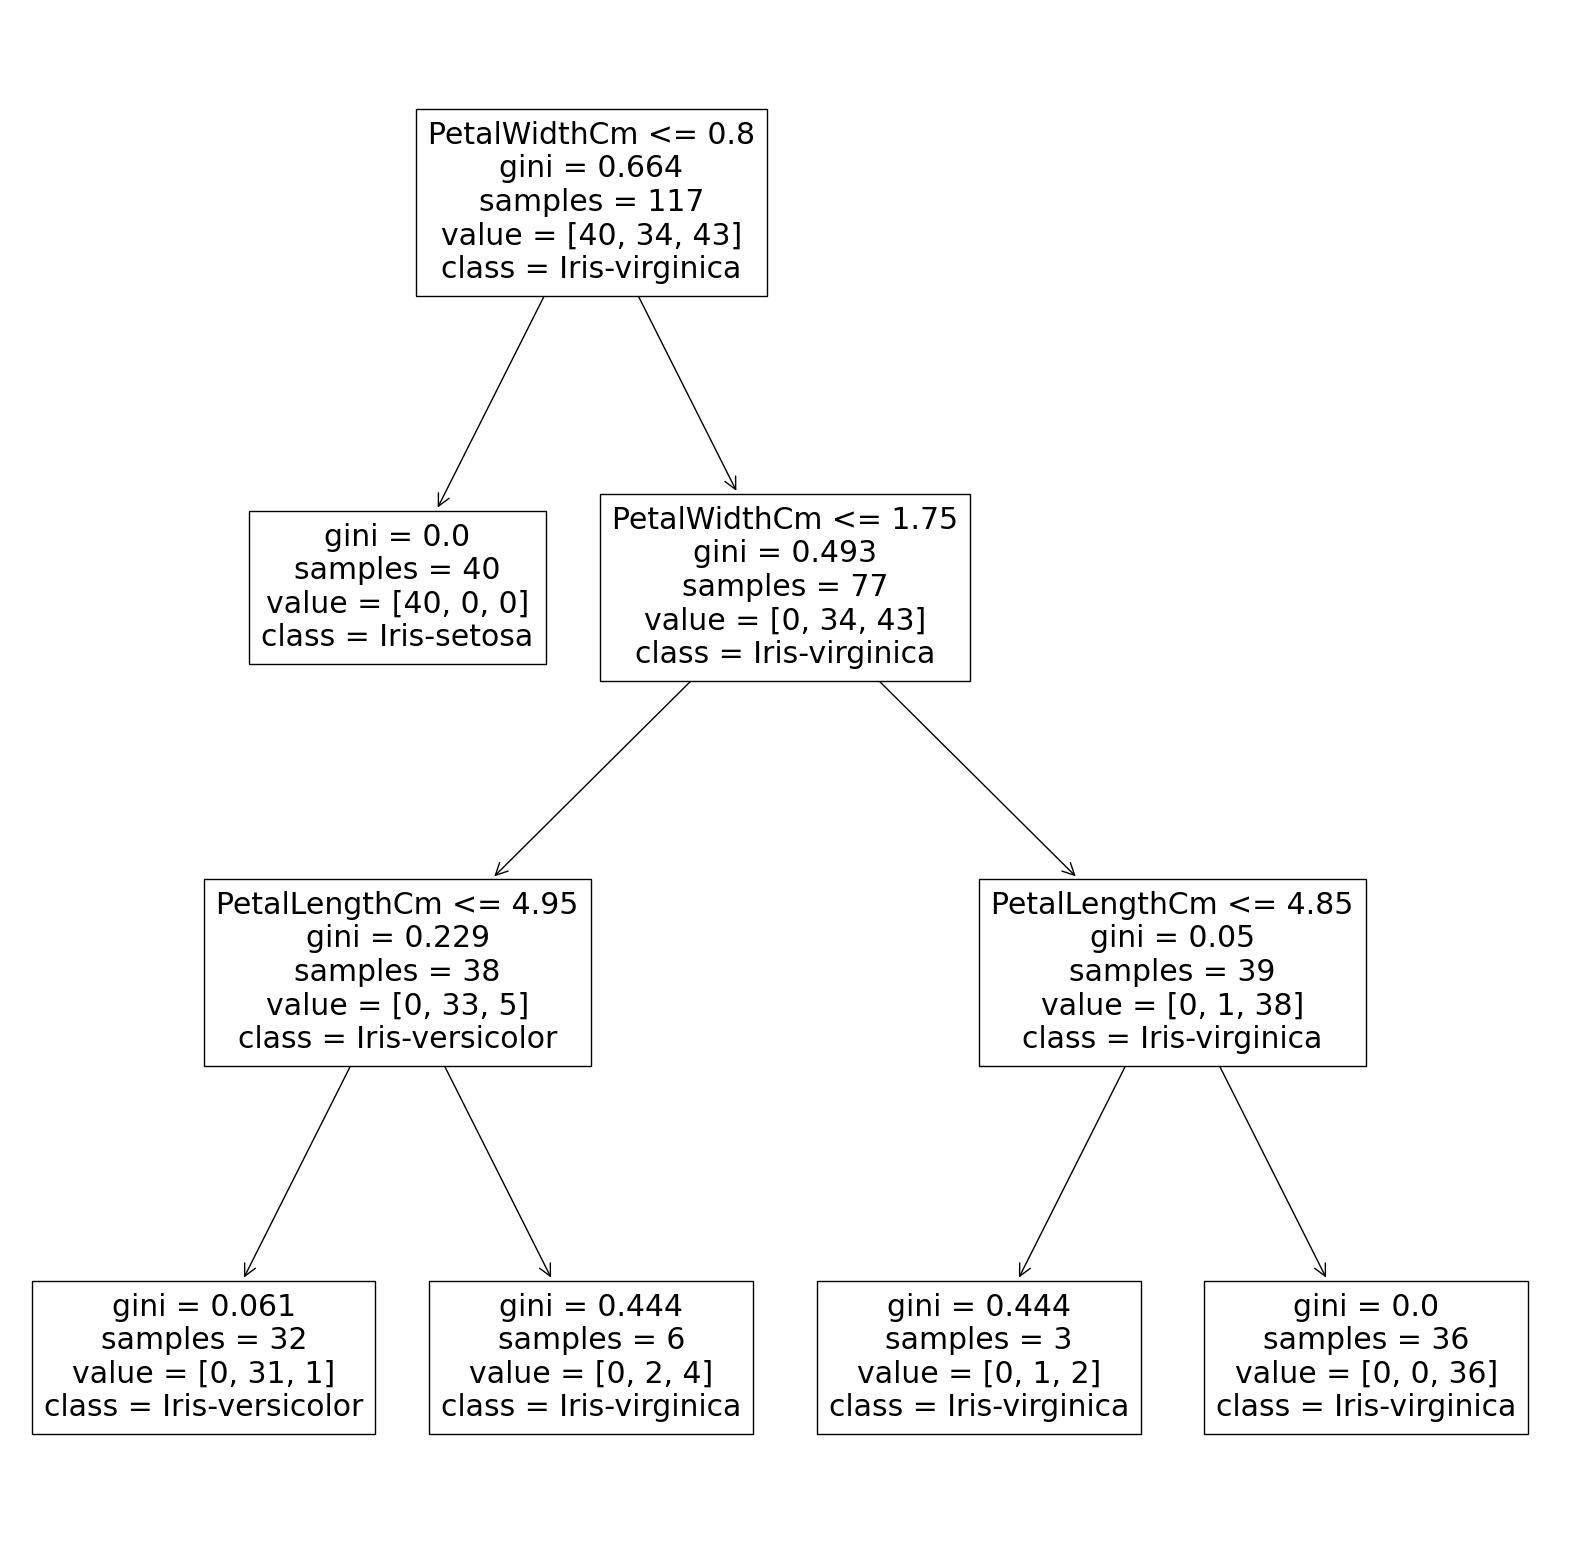

In [29]:
#plot tree can be used for visualising the tree
plt.figure(figsize=(20,20))
plot_tree(dt_iris,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [30]:
#Calculating accuracy
pred = dt_iris.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 1.0


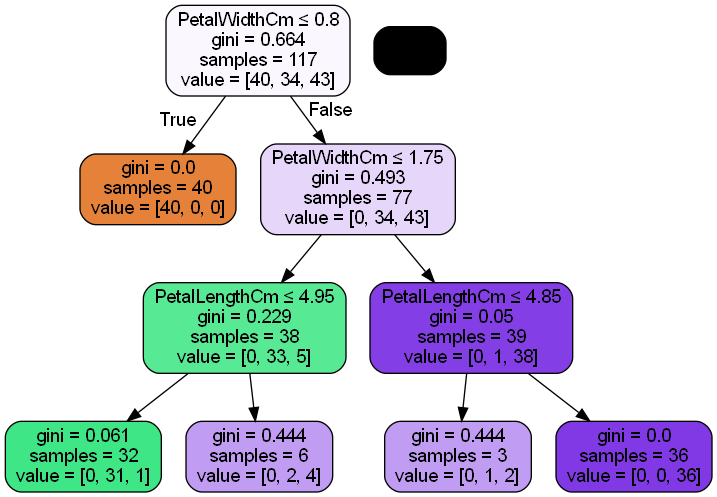

In [31]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dt_iris, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())